<font size=6  color=#003366> <b>[LEPL1109] - STATISTICS AND DATA SCIENCES</b> <br><br> 
<b>Hackathon 03 - Classification: Portuguese wine tasting</b> </font> <br><br><br>

<font size=5  color=#003366>
Prof. D. Hainaut<br>
Prof. L. Jacques<br>

<br><br>
Anne-Sophie Collin   (anne-sophie.collin@uclouvain.be)<br>
Guillaume Van Dessel (guillaume.vandessel@uclouvain.be)<br>
Loïc Van Hoorebeeck (loic.vanhoorebeeck@uclouvain.be)<br>
Jérome Eertmans (jerome.eertmans@uclouvain.be)<br>
Sébastien Colla (sebastien.colla@uclouvain.be)<br>
Dani Manjah (dani.manjah@uclouvain.be)<br>
<div style="text-align: right"> Version 2021</div>

<br><br>
</font>

<font size=5 color=#009999> <b>GUIDELINES & DELIVERABLES</b> </font> <br>
-  This assignment is due on the <b>4 December 2021 at 23h59</b>.
-  Copying code or answers from other groups (or from the internet) is strictly forbidden. <b>Each source of inspiration (stack overflow, git, other groups,...) must be clearly indicated!</b>
-  This notebook (with the "ipynb" extension) file, the Python source file (".py"), the report (PDF format) and all other files that are necessary to run your code must be delivered on <b>Moodle</b>.
- Only the PDF report and the python source file will be graded, both on their content and the quality of the text / figures. <br><br>

<div class="alert alert-danger">
<b>[DELIVERABLE] Summary</b>  <br>
After the reading of this document (and playing with the code!), we expect you to provide us with:
<ol>
   <li> a PDF file (written in LaTeX, see example on Moodle) that answers all the questions below. The report should contain high quality figures with named axes (we recommend saving plots with the <samp>.pdf</samp> extension);
   <li> a Python file with your classifier implementation. Please follow the template that is provided and ensure it passes the so-called <i>sanity</i> tests;
   <li> this Jupyter Notebook (it will not be read, just checked for plagiarism);
   <li> and all other files (not the datasets!) we would need to run your code.
</ol>
</div>

<font size=5 color=#009999> <b>CONTEXT & OBJECTIVE </b> </font> <br>
    
After the completion of your data science course, you decided to give your LEPL1109 assistants team an incredible wine to thank them for their support. At the store, you stand still, lost, in front of a massive range of wine selection. The choice is difficult as they have good taste. Thankfully you come with a brilliant idea that gets two birds with one stone. You use your freshly acquired data science skills to train a model recognizing for you a bottle of quality. You already imagine how impressed they will be when you'll, additionally, explain them how you selected and validated your model.

<img src="Imgs/wine.png" width = "400">

### Dataset description
Thankfully you lay hands on a dataset from a wine contest that happened in Minho, a northwest region of Portugal. The dataset includes 5 000 white wines from the variety of *Vinho verde*. Each wine owns a quality score, determined by a jury and its chemical characteristics. The latter are a collection 11 features individually defined in the table below.  

<img src="Imgs/dataset.png" width = "600">

### Objectives
The project aims to train a binary classifier distinguishing good and bad wines based on the Portuguese wine dataset. Note that the feature *quality* is originally defined as a natural number between 1 and 10. However, we propose, to better address the problem, to class the wines enjoying a score between 1 and 5 as *bad* (labelled 0) and between 6 and 10 as *good* (labelled 1). The subsequent part of the document will guide you through the process. 

### Notebook structure
This notebook is organized into four parts. Each of them assesses one fundamental step to solve our problem and provides one visualization tool to gain some understanding:
* PART 1 - PREPROCESSING
   - 1.1 - Import the dataset
   - 1.2 - Split the dataset
    <br><br>
* PART 2 - EXPLORATORY DATA ANALYSIS 
   - 2.1 - Target proportions
   - 2.2 - Correlation matrix
   - 2.2 - Features selection
   - 2.3 - Scaling the data
    <br><br>
* PART 3 - MODEL SELECTION
   - 3.1 - Precision, recall and F1-score
   - 3.2 - Model evaluation
   - 3.3 - Model selection and parameters tuning
   - 3.4 - Precision-Recall curve and thresholding
   <br><br>
* PART 4 - MODEL TESTING
   - 4.1 - Error computation on the test set 
   
We filled this notebook with preliminary (trivial) code. This practice makes possible to run each cell, even the last ones, without throwing warnings. <b>Take advantage of this aspect to divide the work between all team members!</b> <br><br> 

<br><font size=7 color=#009999> <b>PART 1 - PREPROCESSING</b> </font> <br><br>

<font size=4 color=#009999> <br> 1.1. IMPORT THE DATASET </font> <br>

**Import** `winequality-white.csv` using `read_csv` [<sup>1</sup>](#fn1) from pandas and **obtain** a brief description of the data (_size, variables type, missing values, etc._).  



<span id="fn1"> [1] N.B : the separator in the csv file is ';' and not the default comma (see the *`sep`* argument).</span>

<div class="alert alert-warning">
    <b>[Question 1.1]</b> Describe, briefly, your dataset (size, variables type, missing values, etc.).
</div> 

In [1]:
"""
CELL N°1 : Import the dataset using pd.read_csv function

@pre: filename 'winequality-white.csv', located in the same folder as this jupyter
@post: variable df containing the dataframe
"""

import pandas as pd

df = pd.read_csv('winequality-white.csv',sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


<font size=4 color=#009999> <br> 1.2 - SPLIT THE DATASET </font> <br> 

Data science projects begin by the division the **whole** dataset into a **training** and a **test** set. The subsequent analysis and decisions (i.e. features selection, pre-processing, model selection, etc.) are, then, conducted only on the _training set_ to stay statistically significant during the **testing phase**. The latter will, thus, only be conducted on the _test set_.  

We invite you then to **split** [<sup>2</sup>](#fn2) the dataset into a _training_ and a _test_. The proportion of each subset is at **your own discretion**.


<span id="fn2"> [2] N.B. Set the seed of your random split with `random_state = 42` to obtain reproducible results.</span>



<div class="alert alert-warning">
    <b>[Question 1.2]</b> What are the drawbacks (if any) of choosing a small test set (in proportion)? On the contrary, what are the consequences (if any) of a relatively large testing set (in proportion)? <br>
</div> 

In [2]:
"""
CELL N°2 : SPLIT THE DATASET    

@pre:  'df' a pandas frame with the entire dataset
@post: 2 pandas frames with the train and test sets
"""

from sklearn.model_selection import train_test_split

### split in train and test set
data_train, data_test = train_test_split(df, test_size=0.3, random_state=42, shuffle=True)

<br>

<br><font size=7 color=#009999> <b>PART 2 - EXPLORATORY DATA ANALYSIS </b> </font> <br><br>
 
We **analyze** the distribution of the features _quality_ in the binary scenario. Namely, wines enjoying a score between 1 and 5 are **bad** whereas 6 and 10 as **good**.

We conduct the analysis on the **training set**, avoiding therefore any modelling decision based on _unseen_ data (test set). In most cases, we assume that the distribution of the test set is similar to the training set.

<font size=4 color=#009999> <br> 2.1. Target proportions  </font> <br>

<div class="alert alert-warning">
    <b>[Question 2.1]</b> Are the binary classes balanced? What are the proportions of data in each class? Briefly, justify your answer and add a visualization.
</div> 


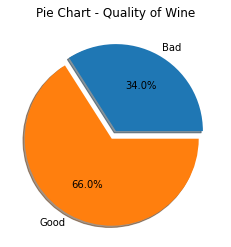

In [3]:
"""
CELL N°3 : Target proportions
   

@pre:  Training dataframe  
@post: proportion of each classes in this train set and a pie chart representing it.    
"""

import matplotlib.pyplot as plt
import numpy as np

y_train = data_train['quality']
y_train_binary = (np.array(y_train) >= 6)*1
y_pie_chart = np.bincount(y_train_binary) 

plt.title("Pie Chart - Quality of Wine")
labels = 'Bad', 'Good'
explode = (0, 0.1)
plt.pie(y_pie_chart, explode = explode, labels=labels, autopct='%1.1f%%', shadow = True)
plt.show()

<font size=4 color=#009999> <br> 2.2. Correlation matrix </font> <br>

__Compute__ and __plot__ the correlation matrix. For the plot, you can use the function `imshow` or `matshow` from `matplotlib` or any other function that suits you.

<div class="alert alert-warning">
    <b>[Question 2.2]</b> With the help of your plot and numerical results of cell 4, write your observations down.  <br
</div> 

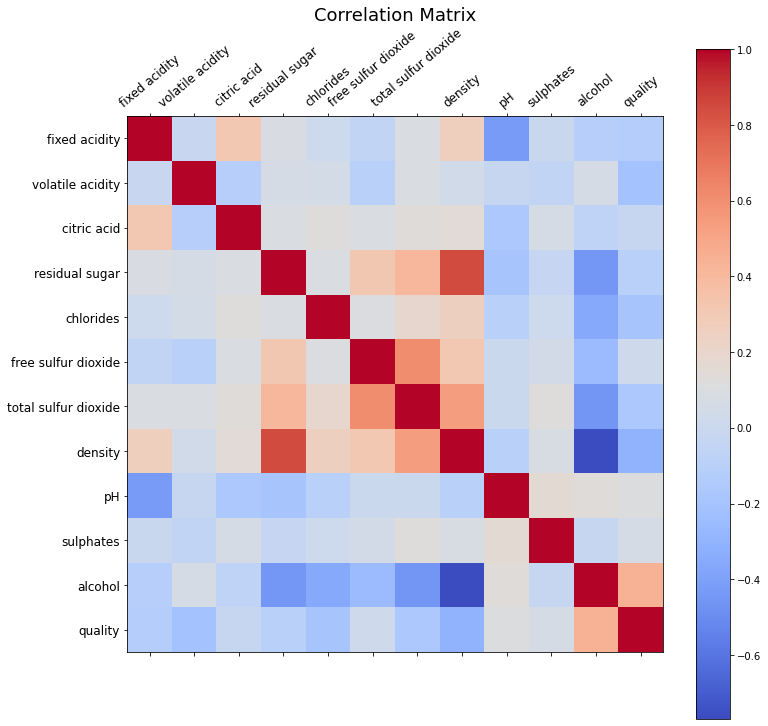

In [4]:
"""
CELL N°4 : CORRELATION MATRIX
   
@pre:  Training dataframe  
@post: The correlation matrix between the features and its plot    
"""
import matplotlib.pyplot as plt

# Compute and plot the correlation matrix
# Display the correlation in cells

fig = plt.figure(figsize=(12, 12))
plt.matshow(data_train.corr(), fignum=fig.number, cmap='coolwarm')
plt.xticks(range(data_train.shape[1]), data_train.columns, fontsize=12, rotation=40)
plt.yticks(range(data_train.shape[1]), data_train.columns, fontsize=12)
cb = plt.colorbar()
plt.title('Correlation Matrix', fontsize=18);

<font size=4 color=#009999> 2.3. Features Selection </font> <br>

Establish a feature selection strategy [<sup>3</sup>](#fn3) and store the feature names in the corresponding variable. 

<span id="fn3"> [3] N.B. E.g. selection of the $n$ first correlated features, setting a correlation threshold or any other rule.</span> 

<div class="alert alert-warning">
    <b>[Question 2.3]</b> Explain your strategy. 
</div> 

In [5]:
"""
CELL N°5 : Features selection 
   
@pre:  The correlation matrix  
@post: The list 'feature_names' with the names of the selected features
"""

def feature_selection_corr(dataFrame,n):
    corr = abs(dataFrame.corrwith(dataFrame["quality"]))
    corr = corr.sort_values()
    return corr[-1-n:-1]

feature_names = feature_selection_corr(data_train, 5).index
print(feature_names)

Index(['total sulfur dioxide', 'chlorides', 'volatile acidity', 'density',
       'alcohol'],
      dtype='object')


<font size=4 color=#009999> <br> 2.4 Data scaling and binary target</font> <br> 

__Split__ your _training_ and _test_ sets into their respective features set  (X)  and a binary target variable (y) [<sup>4</sup>](#fn4). __Standardize__ the features sets. 


__Remark 1.__ The scaler object, used to standardize the training set, should also be the one used on the test set! Also, do no reinvent the wheel!  


<span id="fn4"> [4] Reminder - wines enjoying a quality score between 1 and 5 are **bad** (labelled 0) whereas 6 and 10 as **good** (labelled 1)</span> 

<div class="alert alert-warning">
    <b>[Question 2.4]</b>  Why do we scale data? Justify properly, whether it is necessary or not for your feature set (X).
</div> 

In [6]:
"""
CELL N°6 : Data scaling and binary target 
   
@pre: train and test dataframes and the list 'feature_names' of columns to keep    
@post:  X_train: numpy array, with (scaled) selected features, containing training data
        X_test: numpy array, with (scaled) selected features, containing testing data. 
                The scaling should be done using the statistic of the train set.
        y_train: numpy array of the target feature, containing training data. 
                It only contains 0s (for bad wines) and 1s (for good wines).
        y_test: numpy array of the target feature, containing testing data. 
                It only contains 0s (for bad wines) and 1s (for good wines).
"""

from sklearn.preprocessing import StandardScaler

# Keep only the selected features
X_train = data_train[feature_names]
X_test = data_test[feature_names]

# Binary target
# modified
y_train = (data_train["quality"] >=6)*1
y_test = (data_test["quality"] >=6)*1

# Scaling
# done
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


<font size=4 color=#009999>  </font> <br>

<br><font size=7 color=#009999> <b>PART 3 - MODEL SELECTION </b> </font> <br><br>


<font size=4 color=#009999> <br> 3.1. PRECISION, RECALL AND F1 SCORE </font> <br>

**Implement** the _precision, recall_ and _F-measure_ metrics based on the confusion matrix. Please follow the specifications in the provided template.  <br>

**Reminder**

$F_1$ is a performance metric allowing to obtain some trade-off between the precision and recall criterions. It can be computed as follows:
$$F_1 = 2~\frac{\mathrm{precision} \cdot \mathrm{recall}}{\mathrm{precision} + \mathrm{recall}}.$$

Please consult, [Wikipedia](https://en.wikipedia.org/wiki/F-score) for further information about the metric.

In [7]:
"""
CELL N°7 : IMPLEMENTATION OF PRECISION, RECALL AND F1 METRICS 

@pre:  /  
@post: Follow the specifications to implement precision, recall and probas_to_F1 functions. 
"""
from sklearn.metrics import confusion_matrix
import numpy as np

""" -----------------------------------------------------------------------------------------
Converts a vector of real probability values to a binary 0 or 1 
@pre: 
    - proba_vec: vector with real values representing each a probability to be in the class of good wines.
    - threshold : a threshold probability (between 0 and 1) to determine if a wine is good ('1') 
@post:
    - predicted_labels: binary prediction vector, with elements being 0 or 1.
----------------------------------------------------------------------------------------- """
def pred_probas_to_pred_labels(proba_vec, threshold=0.5):
    return np.where(proba_vec <= threshold, 0, 1)


""" -----------------------------------------------------------------------------------------
Based on the confusion matrix, computes the 'precision'
@pre:
    - cm : confusion_matrix of a binary classification
@post:
    - score: precision (or positive predictive value), associated with cm
----------------------------------------------------------------------------------------- """
def precision(cm):
    _, fp, _, tp = cm.ravel()
    ppv = tp/(tp+fp) # positive predictive value (or precision)
    return ppv


""" -----------------------------------------------------------------------------------------
Based on the confusion matrix, computes the 'recall'
@pre: 
    - cm : confusion_matrix of a binary classification  
@post:
    - r: recall (or true positive rate), associated with cm
----------------------------------------------------------------------------------------- """
def recall(cm):
    _, _, fn, tp = cm.ravel()
    tpr = tp/(tp+fn) # true positive rate (or recall)
    return tpr


""" -----------------------------------------------------------------------------------------
Evaluates the F1 score which is a harmonic mean of the precision and recall
@pre: 
    - y_true: vectors of 0 and 1 representing the real class values
    - y_pred: vectors of real values representing predicted probability of being in the class of good wines ('1')
    - output:  'F1' means that the output should only be the F1 score (default). 
               'PRF1' means that the output is a tuple with (precision, recall, F1)
    - threshold: a threshold probability (between 0 and 1) to determine if a wine is good ('1')
@post:
    - F1_score: harmonic mean of the precision and recall
    - If asked in argument, precision and recall can be added in the output: (precision, recall, F1)
----------------------------------------------------------------------------------------- """
def probas_to_F1(y_true, y_pred, output="F1",threshold=0.5):
    y_pred = pred_probas_to_pred_labels(y_pred, threshold)

    cm = confusion_matrix(y_true, y_pred)
    ppv = precision(cm) # positive predictive value (or precision)
    tpr = recall(cm) # true positive rate (or recall)
    F1_score = 2*ppv*tpr/(ppv+tpr) 

    return (ppv, tpr, F1_score) if output == "PRF1" else F1_score

<font size=4 color=#009999> <br> 3.2. MODEL EVALUATION  </font> <br>

**Implement** `evalParam`, which evaluates, using a __k-fold__ cross-validation, a list of `scikit-learn` models. Use your method `probas_to_F1` as score function. The function `evalParam` must be  **scalable**. Put differently, it must handle $n$ methods, and a variable list of their possible parameters configuration. 


In addition of the list of _models_ (methods) and their list of _hyperparameters_ (param), the function takes as arguments the _features set_ (X), _target variable_ (y) and _the number of folds_ (cv). 

It returns an array _score_ such that <br>

$$score[i][j] = \textrm{average F1 over the folds, using method } \mathit{i} \textrm{ with parameters configuration } j.$$

To help you, here is a pseudo code of K-fold for one method and one configuration of hyperparameters. 

<img src="Imgs/K-fold_pseudo-code.png" width = "650">
 
__Remark 1.__ You have to implement a K-fold cross-validation. You are only allowed to use `KFold.splits(dataset)` from `sklearn.model_selection` to generate the indices of your different folds. 


<div class="alert alert-warning">
    <b>[Question 3.1]</b>
    Explain the idea of K-fold cross-validation and why it is useful. How the choice of K (in the cross-validation) impacts the bias and the variance of the scores obtained on the different folds? Choose and justify the number of folds you consider in this project. 
</div> 

In [8]:
"""
CELL N°8 : Evaluates the methods using different parameters via a K-folds with cv folds

@pre: 
    - methods: list of classifiers to analyze
    - param: list of size len(methods) containing lists of parameters (in dictionary form) to evaluate.
             In other words, param[i][j] is a dictionary of parmeters.
             For example if index i is for KNN, we can have a parameter configuration (with index j) described as
                 param[i][j] = {"n_neigbors":5, "weights": 'uniform'}; 
                 while param[i] is a list of such parameters dictionnaries for model i (here KNN)
    - X: training dataset
    - y: target vector for the corresponding entries of X
    - cv: the number of folds to use in your cross-validation
@post:
    - score: list with same shape as param. score[i][j] = mean score over the folds, 
                                                         using method i with parameters param[i][j]
------------------------------------------------------------------------------------------------ """
from sklearn.model_selection import KFold
import numpy as np
import matplotlib.pyplot as plt

def plot_fit(X, y_val, y_pred):
    print(np.shape(X), np.shape(y_val), np.shape(y_pred))
    plt.plot(X, y_val, 'go')
    plt.plot(X, y_pred, 'ro')
    plt.show()

def evalParam(methods, param, X, y, cv):
    score = [np.zeros(len(param[i])) for i in range(len(methods))]
    X = np.array(X)
    y = np.array(y)
    
    kf = KFold(n_splits=cv)

    for train_index, val_index in kf.split(X):
        X_train, X_val = X[train_index, :], X[val_index, :]
        y_train, y_val = y[train_index].ravel(), y[val_index].ravel()

        for m in range(len(methods)):
            for p in range(len(param[m])):
                methods[m].set_params(**param[m][p])
                methods[m].fit(X_train, y_train)
                y_pred = methods[m].predict(X_val)
                score[m][p] += probas_to_F1(y_val, y_pred)/cv

    return score

<font size=4 color=#009999> <br> 3.3. MODEL SELECTION AND PARAMETERS TUNING </font> <br>

__Run__ your function `evalParam` to evaluate the three following models : [_linear regression_](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression), [_logistic regression_](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) and [_K nearest neighbors_](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html). These models are already implemented in sklearn. <br>

**Investigate** the effect of the following hyperparameters:
- `n_neighbors` in KNN (try selected values between 1 and 100),
- `weights` in KNN (try both values 'uniform' and 'distance')
- `C` in logistic regression (try selected values between $10^{-3}$ and $10^3$)</li>


<div class="alert alert-warning">
    <b>[Question you should ask yourself]</b> (Not graded) Prior to the run, discuss the fitness of each model to answer to our problem. 
</div> 

<div class="alert alert-warning">
    <b>[Question 3.2]</b> Explain your methodology of model evaluation. More precisely, explain which hyperparameters you tune and the values you test for each of them. Next, provide the best hyperparameters configuration for each of the three models as well as their CV F1 score.
</div>


In [9]:
"""
CELL N°9 : Model selection - tuning the three methods
   
@pre:  evalParam function correctly implemented    
@post: three models (knn, linear and logistic regression) initialized with tuned hyperparameters.
        print the best hyperparameters found, as well as their CV F1 scores associated with these hyperparameters.
------------------------------------------------------------------------------------------------ """

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

linreg = LinearRegression()
logreg = LogisticRegression()
knn = KNeighborsClassifier()
methods = [linreg, logreg, knn]

paramLR = [{}]
paramLoR = [{"C":i} for i in np.logspace(-3, 3, num=7)]
paramKNN = [{"n_neighbors": i, "weights": j} for j in ("uniform", "distance") for i in range(1, 101)]
param = [paramLR, paramLoR, paramKNN]

cv = 5 # TO MODIFY according to your choice (see Question 3.2)
cv_scores = evalParam(methods, param, X_train, y_train, cv)

for (i,j) in zip(param, cv_scores):
    for (m,n) in zip(i,j):
        print(m, n)

### Finding the best parameters for each model ###
# linear regression
LRbest = cv_scores[0].argmax()
print("Best param config for Linear Regression is", paramLR[LRbest], "with score {0:.4f}".format(cv_scores[0][LRbest]))
linreg.set_params(**paramLR[LRbest])

# Logistic regression
LoRbest = cv_scores[1].argmax()
print("Best param config for Logistic Regression is", paramLoR[LoRbest], "with score {0:.4f}".format(cv_scores[1][LoRbest]))
logreg.set_params(**paramLoR[LoRbest])

# KNN
KNNbest = cv_scores[2].argmax()
print("Best param config for KNN is", paramKNN[KNNbest], "with score {0:.4f}".format(cv_scores[2][KNNbest]))
knn.set_params(**paramKNN[KNNbest]);

{} 0.8201087411908404
{'C': 0.001} 0.8041001605087768
{'C': 0.01} 0.8155125022102917
{'C': 0.1} 0.8169935594992235
{'C': 1.0} 0.8185557956266781
{'C': 10.0} 0.818386848838317
{'C': 100.0} 0.818386848838317
{'C': 1000.0} 0.818386848838317
{'n_neighbors': 1, 'weights': 'uniform'} 0.8156341535140856
{'n_neighbors': 2, 'weights': 'uniform'} 0.7531307563155829
{'n_neighbors': 3, 'weights': 'uniform'} 0.8149032722287574
{'n_neighbors': 4, 'weights': 'uniform'} 0.788743883587655
{'n_neighbors': 5, 'weights': 'uniform'} 0.8172863604358093
{'n_neighbors': 6, 'weights': 'uniform'} 0.7981372697909989
{'n_neighbors': 7, 'weights': 'uniform'} 0.8167035371185102
{'n_neighbors': 8, 'weights': 'uniform'} 0.8121509558105376
{'n_neighbors': 9, 'weights': 'uniform'} 0.8205635655886863
{'n_neighbors': 10, 'weights': 'uniform'} 0.8173542346308431
{'n_neighbors': 11, 'weights': 'uniform'} 0.825179181537985
{'n_neighbors': 12, 'weights': 'uniform'} 0.8204709667113397
{'n_neighbors': 13, 'weights': 'uniform'}

<div class="alert alert-warning">
    <b>[Question 3.3]</b> Based on your answers to previous questions, select a final model that you will keep as classifier. Justify.
</div> 

<font size=4 color=#009999> <br> 3.4. Precision, Recall and thresholding </font> <br>

In general, the classifying models compute first the probability for a point to belong to a certain class. Next, they applies a threshold to assign the final label (bad or good). By default, `scikit-learn` applies a threshold of 0.5 for KNN and logistic regression. You can use the function `predict_proba` to obtain the original probabilities. <br>
For analyzing the impact of the threshold on the precision and recall of a model, we generally plot its precision-recall curve. Specific functions in sklearn help doing that plot (see [sklearn documentation](https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html)). <br>
Here we only ask you theoretical questions, so we don't expect any plot from you, but feel free to create some for your own reflection and to help you answering correctly.

<div class="alert alert-warning">
    <b>[Question 3.4]</b> What happens to the precision and recall (of any method) when the threshold tends to 0? And when it tends to 1? Explain and, if possible, establish a link with Question 2.1.
</div>

<div class="alert alert-warning">
    <b>[Question 3.5]</b> 
    Explain which precision/recall trade-off you prefer to have for the specific task asked in this hackathon: finding a good bottle of wines for your teaching assistants. How should you adjust the threshold of your model to bring it closer to the desired trade-off? Should it be above or below the default threshold value of 0.5? <br>
    <b> Note: </b> In the next section, we will keep considering the default threshold value of 0.5.
</div>


<br>

<br><font size=7 color=#009999> <b>PART 4 - MODEL TESTING </b> </font> <br><br>

<div class="alert alert-warning">
    <b>[Question 4.1]</b> Use the test set to estimate the precision, recall and F1 score of your final model and validate its performance on unseen data. <br> Observe if the scores are similar to the ones estimated with your cross-validation.
        Are you satisfied by the performance of your classifier, in view of the task for which it will be used?

</div> 


In [10]:
"""
CELL N°10 : MODEL TESTING
   
@pre:   clf is your selected classifier
        X_test is the numpy array containing the test set (with your selected features)
        y_test is the numpy array contaning your binary target vector
@post:  print the F1, precision and recall on the test set.
------------------------------------------------------------------------------------------------ """

y_pred = np.ones_like(y_test)  # to modif with your classifier prediction
(prec, rec, F1) = probas_to_F1(y_test, y_pred, "PRF1") # metrics